<a href="https://colab.research.google.com/github/BingHungLee/BHAI-Daily-Practice/blob/main/%5B20210707%5D_Matplotlib_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Matplotlib](https://matplotlib.org/)
Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

Reference: https://github.com/BingHung/AI/blob/master/%5B02262019_3%5D_Matplotlib_Intro.ipynb
​

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

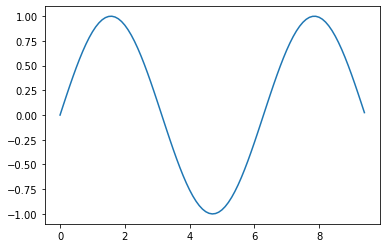

In [ ]:
import numpy as np
x = np.arange(0, 3* np.pi, 0.1)
y = np.sin(x)

plt.plot(x, y)
plt.show()

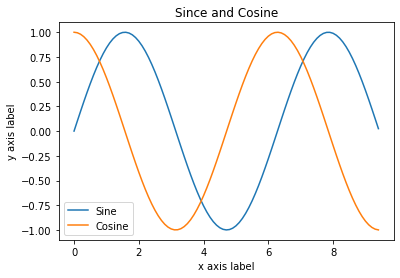

In [ ]:
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel("x axis label")
plt.ylabel("y axis label")
plt.title("Since and Cosine")
plt.legend(["Sine", "Cosine"])
plt.show()

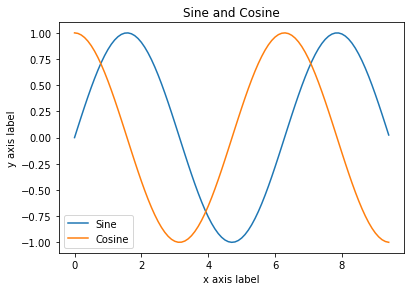

In [ ]:
fig = plt.figure()
#新增Figure的軸（左,下,寬度,高度)，範圍佔Figure的比例（數值介於0-1）
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(x,y_sin)
axes.plot(x,y_cos)
axes.set_xlabel("x axis label")
axes.set_ylabel("y axis label")
axes.set_title("Sine and Cosine")
plt.legend(["Sine", "Cosine"])

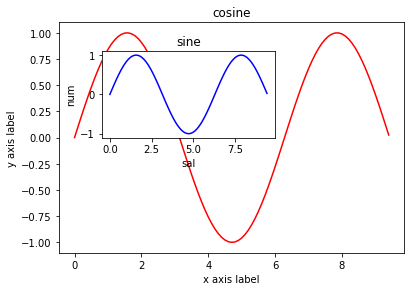

In [ ]:

# Use axes to make plot in plot
#製作空白的figure來製作圖中圖
fig = plt.figure()

#在figure上建立第一個圖主要的軸，再設定第二個圖的軸（剛剛只畫第一個圖看不太出來差異，製作第二個軸就看得出來）
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])

#第一個大圖
axes1.plot(x, y, 'r')
axes1.set_xlabel('x axis label')
axes1.set_ylabel('y axis label')
axes1.set_title('cosine')

#第二個較小的圖
axes2.plot(x, y, 'b')
axes2.set_xlabel('sal')
axes2.set_ylabel('num')
axes2.set_title('sine');

In [ ]:
df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")
df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


In [ ]:
df.shape
df.groupby("name").size()

name
Barton LLC                         82
Cronin, Oberbrunner and Spencer    67
Frami, Hills and Schmidt           72
Fritsch, Russel and Anderson       81
Halvorson, Crona and Champlin      58
Herman LLC                         62
Jerde-Hilpert                      89
Kassulke, Ondricka and Metz        64
Keeling LLC                        74
Kiehn-Spinka                       79
Koepp Ltd                          82
Kuhn-Gusikowski                    73
Kulas Inc                          94
Pollich LLC                        73
Purdy-Kunde                        53
Sanford and Sons                   71
Stokes LLC                         72
Trantow-Barrows                    94
White-Trantow                      86
Will LLC                           74
dtype: int64

In [ ]:
# 將前十名依據採購次數和交易額做排序
top_10 = df.groupby('name')['ext price', 'quantity'].agg({'ext price': 'sum', 'quantity': 'count'}).sort_values(by='ext price', ascending=False)[:10].reset_index()
print(top_10)
top_10.rename(columns={'name': 'Name', 'ext price': 'Sales', 'quantity': 'Purchases'}, inplace=True) #replace 
top_10

                           name  ext price  quantity
0                     Kulas Inc  137351.96        94
1                 White-Trantow  135841.99        86
2               Trantow-Barrows  123381.38        94
3                 Jerde-Hilpert  112591.43        89
4  Fritsch, Russel and Anderson  112214.71        81
5                    Barton LLC  109438.50        82
6                      Will LLC  104437.60        74
7                     Koepp Ltd  103660.54        82
8      Frami, Hills and Schmidt  103569.59        72
9                   Keeling LLC  100934.30        74


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Name,Sales,Purchases
0,Kulas Inc,137351.96,94
1,White-Trantow,135841.99,86
2,Trantow-Barrows,123381.38,94
3,Jerde-Hilpert,112591.43,89
4,"Fritsch, Russel and Anderson",112214.71,81
5,Barton LLC,109438.50,82
6,Will LLC,104437.60,74
7,Koepp Ltd,103660.54,82
8,"Frami, Hills and Schmidt",103569.59,72
9,Keeling LLC,100934.30,74


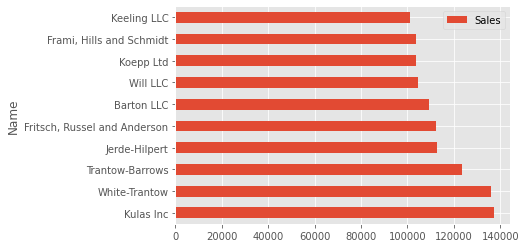

In [ ]:
# 使用 ggplot 風格
plt.style.use('ggplot')

# 繪製長條圖
top_10.plot(kind='barh', y="Sales", x="Name")
plt.show()

In [ ]:
## currect function 會將超過一千的數字轉換成文字 K, M
def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000000:
        return '${:1.1f}M'.format(x*1e-6)
    return '${:1.0f}K'.format(x*1e-3)

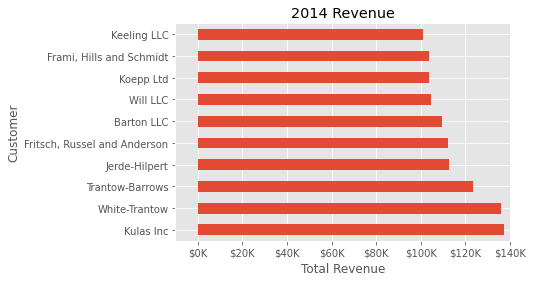

In [ ]:
from matplotlib.ticker import FuncFormatter
#建立 fig, ax
fig, ax = plt.subplots()

# 將 Barplot (x=名稱, y=銷售量) 繪製在 ax上
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)

# 設置 x 範圍
ax.set_xlim([-10000, 140000])

# 給訂 title, label
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')

# 建立要使用的格式函數
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)

# 將 legend 遮蔽掉
ax.legend().set_visible(False)

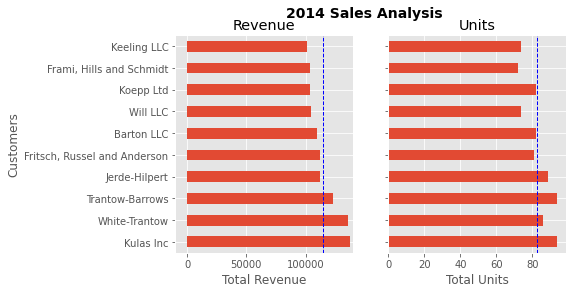

In [ ]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 4))
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax0)
ax0.set_xlim([-10000, 140000])
ax0.set(title='Revenue', xlabel='Total Revenue', ylabel='Customers')

# Plot the average as a vertical line
avg = top_10['Sales'].mean()
ax0.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Repeat for the unit plot
top_10.plot(kind='barh', y="Purchases", x="Name", ax=ax1)
avg = top_10['Purchases'].mean()
ax1.set(title='Units', xlabel='Total Units', ylabel='')
ax1.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Title the figure
fig.suptitle('2014 Sales Analysis', fontsize=14, fontweight='bold');

# Hide the legends
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

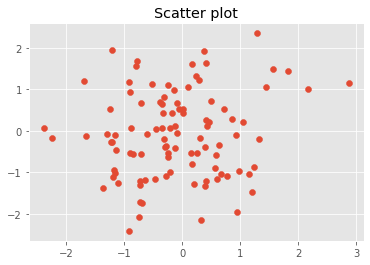

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

X = np.random.normal(0, 1, 100)
Y = np.random.normal(0, 1, 100)
plt.scatter(X, Y)
plt.title("Scatter plot")
plt.show()

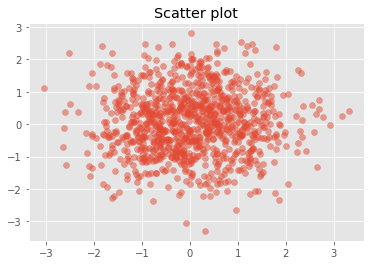

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

X = np.random.normal(0, 1, 1000)
Y = np.random.normal(0, 1, 1000)
plt.scatter(X, Y, alpha=0.5)
plt.title("Scatter plot")
plt.show()